In [1]:
import qsvm4eo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data

In [2]:
x_train, y_train, x_test, y_test, label_names = qsvm4eo.load_data(
    data_path="..", num_features=4, scale_features=True
)

print(f"X_train: {x_train.shape}, Y_train: {len(y_train)}")
print(f"X_test: {x_test.shape}, Y_test: {len(y_test)}")

X_train: (1024, 4), Y_train: 1024
X_test: (1024, 4), Y_test: 1024


# SVM Training

In [3]:
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
kernel_train_score = []
kernel_test_score = []

for kernel in kernel_list:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(x_train, y_train)

    train_score = svc_classifier.score(x_train, y_train)
    test_score = svc_classifier.score(x_test, y_test)

    kernel_train_score.append(train_score)
    kernel_test_score.append(test_score)

    print(f"Kernel: {kernel}, train score: {train_score}, test score: {test_score}")

best_kernel = kernel_list[np.argmax(kernel_test_score)]

Kernel: linear, train score: 0.8056640625, test score: 0.5439453125
Kernel: poly, train score: 0.8056640625, test score: 0.6962890625
Kernel: rbf, train score: 0.828125, test score: 0.5966796875
Kernel: sigmoid, train score: 0.685546875, test score: 0.3916015625


In [4]:
svc_classifier = SVC(kernel=best_kernel)
svc_classifier.fit(x_train, y_train)

train_score = svc_classifier.score(x_train, y_train)
test_score = svc_classifier.score(x_test, y_test)
print(train_score, test_score)

y_test_pred = svc_classifier.predict(x_test)

0.8056640625 0.6962890625


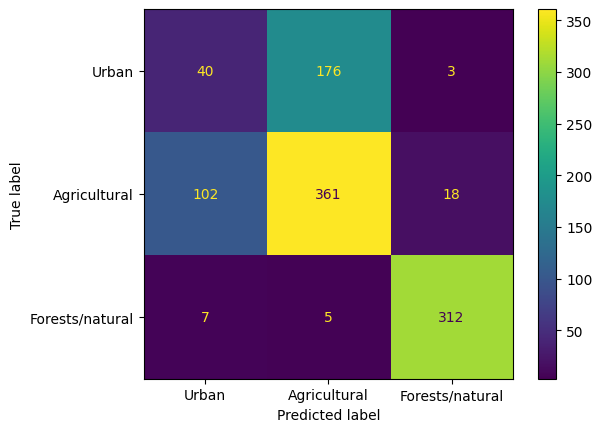

In [5]:
conf_mat = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=label_names.values())
disp.plot()
plt.show()